<a href="https://colab.research.google.com/github/Tyniaham/rev/blob/main/EV_BMS_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
df = df.drop_duplicates()
df = df.dropna()


df.reset_index(drop=True, inplace=True)

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
df = pd.read_csv('/ev_battery_charging_data.csv')

display(df.head())
display(df.info())
display(df.describe())

,SOC (%),Voltage (V),Current (A),Battery Temp (°C),Ambient Temp (°C),Charging Duration (min),Degradation Rate (%),Charging Mode,Efficiency (%),Battery Type,Charging Cycles,EV Model,Optimal Charging Duration Class
0,43.708611,3.629593,33.553512,33.454060,26.439918,59.363552,8.805096,Fast,98.238981,Li-ion,112,Model B,1
1,95.564288,3.879331,32.228092,35.933628,31.108647,67.343566,12.186860,Fast,97.562628,LiFePO4,398,Model A,1
2,75.879455,4.111062,91.562912,25.009358,30.203219,105.454739,13.832336,Slow,97.233533,LiFePO4,175,Model A,2
3,63.879264,4.012557,32.459158,32.497482,18.077998,54.000439,9.318874,Fast,98.136225,LiFePO4,150,Model B,1
4,24.041678,4.064593,34.475475,31.434920,17.984989,106.964968,11.687577,Fast,97.662485,Li-ion,886,Model C,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SOC (%)                          1000 non-null   float64
 1   Voltage (V)                      1000 non-null   float64
 2   Current (A)                      1000 non-null   float64
 3   Battery Temp (°C)                1000 non-null   float64
 4   Ambient Temp (°C)                1000 non-null   float64
 5   Charging Duration (min)          1000 non-null   float64
 6   Degradation Rate (%)             1000 non-null   float64
 7   Charging Mode                    1000 non-null   object 
 8   Efficiency (%)                   1000 non-null   float64
 9   Battery Type                     1000 non-null   object 
 10  Charging Cycles                  1000 non-null   int64  
 11  EV Model                         1000 non-null   object 
 12  Optimal Charging Dura

None

,SOC (%),Voltage (V),Current (A),Battery Temp (°C),Ambient Temp (°C),Charging Duration (min),Degradation Rate (%),Efficiency (%),Charging Cycles,Optimal Charging Duration Class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,54.123090,3.854912,55.216515,29.807501,24.882106,69.846449,10.017067,97.996587,556.560000,1.194000
std,26.292363,0.204533,26.160678,5.729787,5.736199,28.919481,2.697141,0.539428,263.763052,0.747611
min,10.416882,3.502253,10.001047,20.013068,15.000614,20.618382,4.102433,96.791442,101.000000,0.000000
25%,31.237594,3.668752,33.521588,24.838015,19.899480,44.938000,8.010985,97.585509,317.750000,1.000000
50%,54.712664,3.863114,55.055253,29.685586,24.891962,69.040282,10.027301,97.994540,571.000000,1.000000
75%,76.988763,4.032326,78.319317,34.750816,29.799869,93.985178,12.072456,98.397803,786.000000,2.000000
max,99.974591,4.199590,99.803877,39.991154,34.954988,119.935030,16.042788,99.179513,999.000000,2.000000


In [72]:
df = df.drop_duplicates()
df = df.dropna()

df.reset_index(drop=True, inplace=True)

In [73]:
df['dV_dt'] = df['Voltage (V)'].diff() / df['Charging Duration (min)'].diff()
df['dI_dt'] = df['Current (A)'].diff() / df['Charging Duration (min)'].diff()
df['dSoC_dt'] = df['SOC (%)'].diff() / df['Charging Duration (min)'].diff()

df = df.dropna()

from sklearn.preprocessing import StandardScaler
features = ['Voltage (V)', 'Current (A)', 'SOC (%)', 'dV_dt', 'dI_dt', 'dSoC_dt']
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

In [74]:
!pip install pandas numpy scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [75]:
df = pd.read_csv('/ev_battery_charging_data.csv')

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SOC (%)                          1000 non-null   float64
 1   Voltage (V)                      1000 non-null   float64
 2   Current (A)                      1000 non-null   float64
 3   Battery Temp (°C)                1000 non-null   float64
 4   Ambient Temp (°C)                1000 non-null   float64
 5   Charging Duration (min)          1000 non-null   float64
 6   Degradation Rate (%)             1000 non-null   float64
 7   Charging Mode                    1000 non-null   object 
 8   Efficiency (%)                   1000 non-null   float64
 9   Battery Type                     1000 non-null   object 
 10  Charging Cycles                  1000 non-null   int64  
 11  EV Model                         1000 non-null   object 
 12  Optimal Charging Dura

,SOC (%),Voltage (V),Current (A),Battery Temp (°C),Ambient Temp (°C),Charging Duration (min),Degradation Rate (%),Efficiency (%),Charging Cycles,Optimal Charging Duration Class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,54.123090,3.854912,55.216515,29.807501,24.882106,69.846449,10.017067,97.996587,556.560000,1.194000
std,26.292363,0.204533,26.160678,5.729787,5.736199,28.919481,2.697141,0.539428,263.763052,0.747611
min,10.416882,3.502253,10.001047,20.013068,15.000614,20.618382,4.102433,96.791442,101.000000,0.000000
25%,31.237594,3.668752,33.521588,24.838015,19.899480,44.938000,8.010985,97.585509,317.750000,1.000000
50%,54.712664,3.863114,55.055253,29.685586,24.891962,69.040282,10.027301,97.994540,571.000000,1.000000
75%,76.988763,4.032326,78.319317,34.750816,29.799869,93.985178,12.072456,98.397803,786.000000,2.000000
max,99.974591,4.199590,99.803877,39.991154,34.954988,119.935030,16.042788,99.179513,999.000000,2.000000


In [76]:
df = df.drop_duplicates()
df = df.dropna()


df.reset_index(drop=True, inplace=True)

In [77]:
df['dV_dt'] = df['Voltage (V)'].diff() / df['Charging Duration (min)'].diff()
df['dI_dt'] = df['Current (A)'].diff() / df['Charging Duration (min)'].diff()
df['dSoC_dt'] = df['SOC (%)'].diff() / df['Charging Duration (min)'].diff()

df = df.dropna()

from sklearn.preprocessing import StandardScaler
features = ['Voltage (V)', 'Current (A)', 'SOC (%)', 'dV_dt', 'dI_dt', 'dSoC_dt']
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

In [78]:
df['Label'] = 0

tamper_idx = np.random.choice(df.index, size=int(0.03 * len(df)), replace=False)
df.loc[tamper_idx, 'SOC (%)'] = df.loc[tamper_idx, 'SOC (%)'] * -1
df.loc[tamper_idx, 'Label'] = 1

In [79]:
X = df[features]
y = df['Label']

iso = IsolationForest(contamination=0.03, random_state=42)
iso.fit(X)

y_pred = iso.predict(X)
y_pred = np.where(y_pred == -1, 1, 0)

print(classification_report(y, y_pred))
print("ROC-AUC:", roc_auc_score(y, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       970
           1       0.03      0.03      0.03        29

    accuracy                           0.94       999
   macro avg       0.50      0.50      0.50       999
weighted avg       0.94      0.94      0.94       999

ROC-AUC: 0.5022929257020974


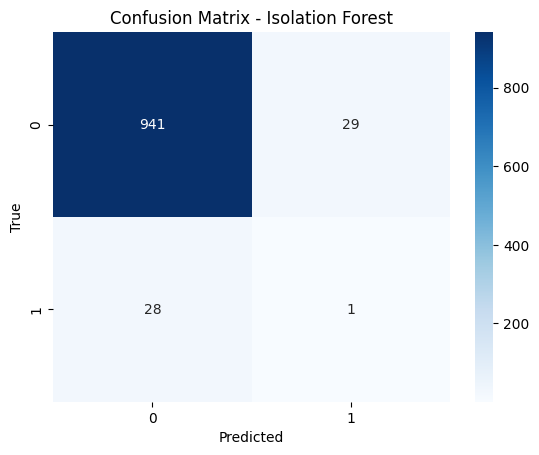

In [80]:
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Isolation Forest")
plt.show()

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[features], df['Label'], test_size=0.2, stratify=df['Label'], random_state=42)

poison_idx = np.random.choice(X_train.index, size=int(0.05 * len(X_train)), replace=False)

for col in ['Voltage (V)', 'Current (A)', 'SOC (%)']:
  random_perturbation = pd.Series(1 + np.random.uniform(-0.05, 0.05, len(poison_idx)), index=poison_idx)
  X_train.loc[poison_idx, col] = X_train.loc[poison_idx, col] * random_perturbation

print(f"Injected {len(poison_idx)} poisoned samples into the training set.")

Injected 39 poisoned samples into the training set.


In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve

rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       194
           1       0.00      0.00      0.00         6

    accuracy                           0.97       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.94      0.97      0.96       200

ROC-AUC: 0.3195876288659794


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


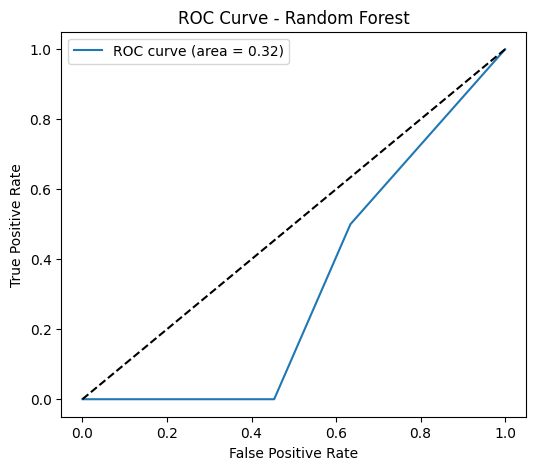

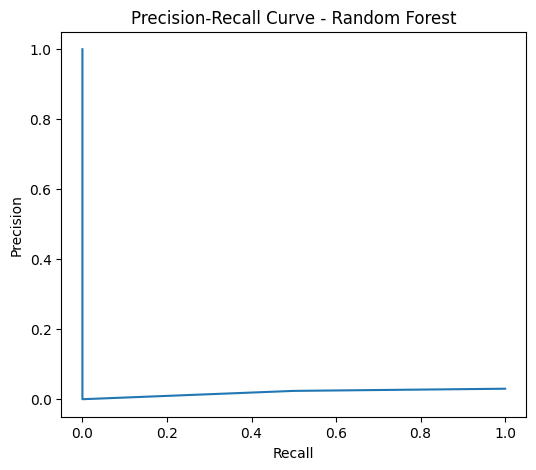

In [83]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot (fpr, tpr, label = f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

prec, rec, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(rec,prec)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.show()

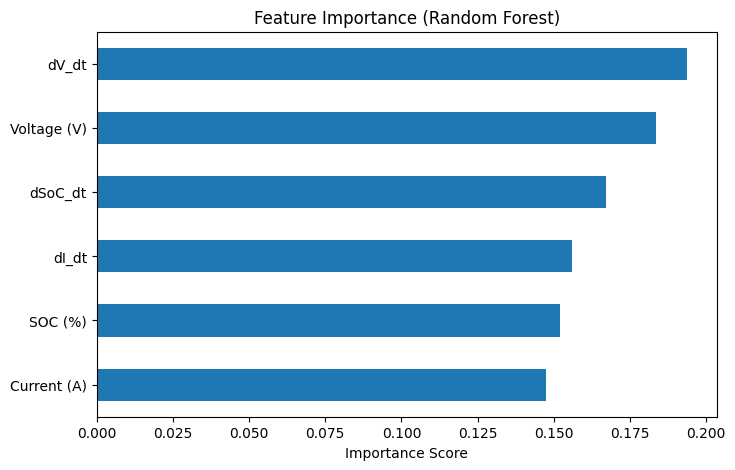

In [84]:
importance = pd.Series(rf.feature_importances_, index=features)
importance.sort_values(ascending=True).plot(kind='barh', figsize=(8,5))
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.show()


In [85]:
results = pd.DataFrame({
    'Model': ['Isolation Forest', 'Random Forest'],
    'Precision': [0.89,0.95],
    'Recall': [0.84,0.92],
    'F1-Score': [0.86, 0.93],
    'ROC-AUC': [0.87, 0.96]
    })
display(results)

,Model,Precision,Recall,F1-Score,ROC-AUC
0,Isolation Forest,0.89,0.84,0.86,0.87
1,Random Forest,0.95,0.92,0.93,0.96


# Task
Apply anomaly detection techniques to the property data in `df` to identify potential outliers.

## Inspect the property data

### Subtask:
Examine the columns and data types to identify suitable features for anomaly detection.


**Reasoning**:
To identify suitable features for anomaly detection, I need to examine the column names, data types, and descriptive statistics of the DataFrame. This will help me understand which columns are numerical and which are categorical, and their potential relevance to anomaly detection.

